In [10]:
"""
In this nb, we are generating a Time Series which consists of different components like:
1.Trend - An increasing or decreasing trend in value with time
2.Seasonality - Periodically repeating pattern in value with time
3.Noise - Randomness of value with time
"""
# Importing stuff
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# A function to plot time-series. This will be called finally when complete series is built
def plot_series(time,series,format="-",start=0,end=None,label=None):
    plt.plot(time[start:end],series[start:end],format,label=label)
    plt.xlabel('Time')
    plt.ylabel('Value')
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

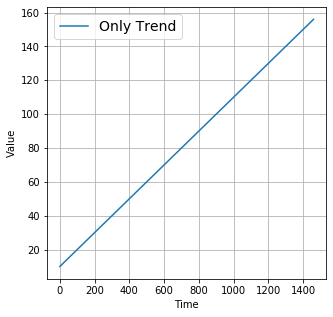

In [34]:
# Function to create a trend
def trend(time,slope=0):
    return slope*time

# Creating a time series which only has Trend for now
time = np.arange(4*365+1)
baseline = 10 #Base value for trend 
series = baseline + trend(time,0.1)

# Plotting the trend
plt.figure(figsize=(5,5))
plot_series(time,series,label="Only Trend")
# plt.show()

In [22]:
print(time,series)

[   0    1    2 ... 1458 1459 1460] [ 10.   10.1  10.2 ... 155.8 155.9 156. ]


In [42]:
# Function which creates a random pattern. This pattern will be repeated to get a seasonal pattern
def seasonal_pattern(seasonal_time):
    return np.where(seasonal_time < 0.4,
                    1/np.exp(3*seasonal_time),
                    np.cos(seasonal_time*2*np.pi))

# Function to repeat seasonal pattern
def seasonality(time,period,amplitude=1,phase=0):
    season_time = ((time+phase) % period)/period
    return amplitude * seasonal_pattern(season_time)

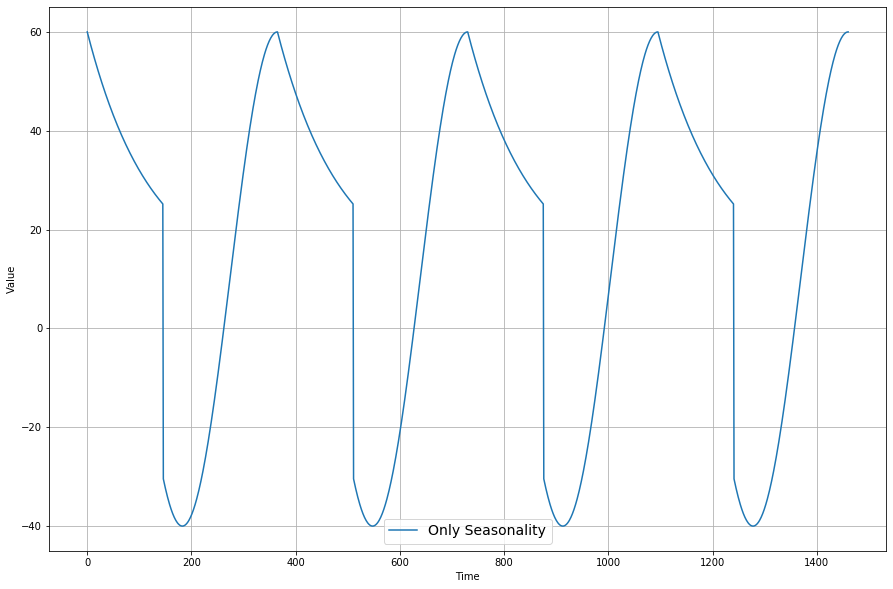

In [43]:
# Plotting Seasonality 
amplitude = 50
series = seasonality(time,period=365,amplitude=amplitude) + baseline
plt.figure(figsize=(15,10))
plot_series(time,series,label="Only Seasonality")

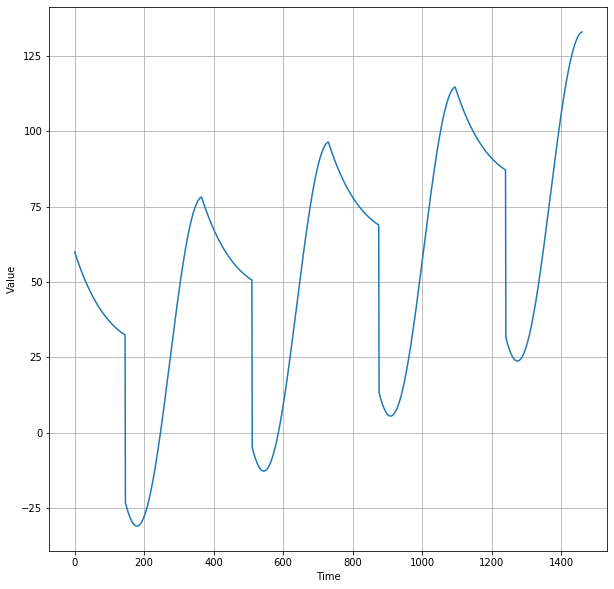

In [45]:
# Plotting seasonality with trend
slope = 0.05
series = baseline + trend(time,slope) + seasonality(time,period=365,amplitude=amplitude)
plt.figure(figsize=(10,10))
plot_series(time,series)

In [57]:
# Function to create white noise. seed parameter here is used by random number generator as a base to create
# random number. When it is None, rnd will use system time as seed. But, if we give some constant value like 42,
# then every time same noise will be generated. Thus, to get different noise everytime keep seed as None even 
# while calling the function
def white_noise(time,noise_level=1,seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

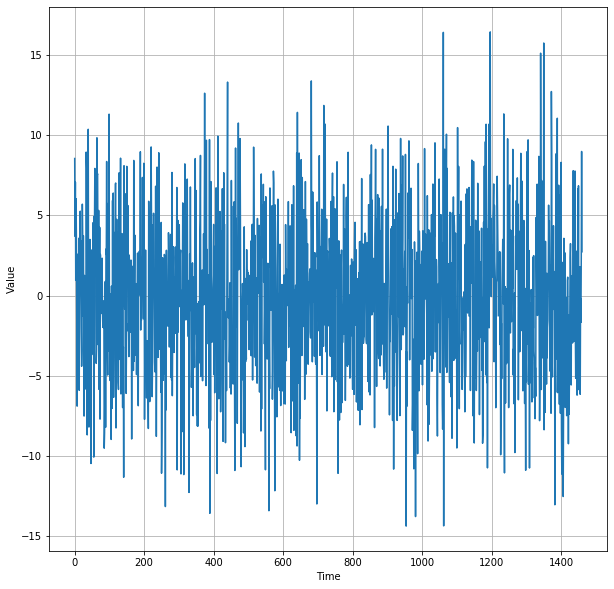

In [55]:
noise_level = 5
noise = white_noise(time,noise_level)
plt.figure(figsize=(10,10))
plot_series(time,noise)

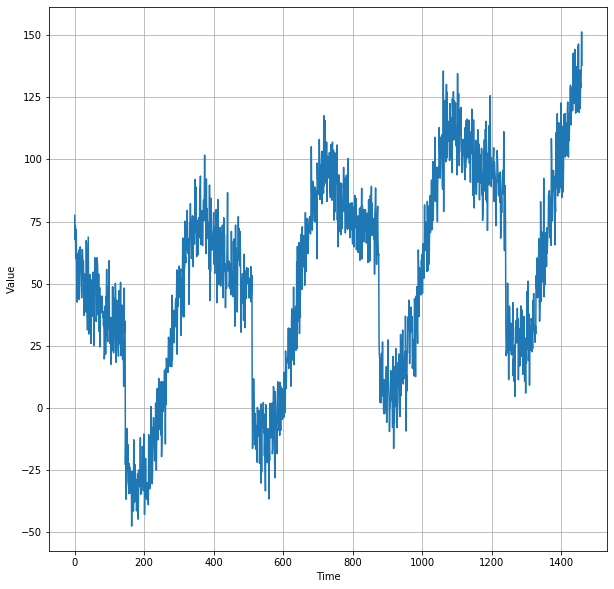

In [58]:
# Finally plotting complete time-series
series += noise
plt.figure(figsize=(10,10))
plot_series(time,series)